**Exercise 1 :** Basic Image Processing

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import filters,rotate,shift
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter, convolve

<ipython-input-1-637ed5385b7b>:5: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter, convolve
<ipython-input-1-637ed5385b7b>:5: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter, convolve
<ipython-input-1-637ed5385b7b>:5: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter, convolve


In [2]:
def  harris_corner_detector(k,img,window_size):

  corners_filtered = []
  if len(img.shape) == 3 and img.shape[2] == 3:
        # If the image has 3 channels (RGB or BGR), convert it to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  else:
        # If the image is already in grayscale
        img_gray = img

  img_uint8 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
  output_img = cv2.cvtColor(img_uint8.copy(), cv2.COLOR_GRAY2RGB)



  #step 1: Compute approximations of Ix and Iy
  Ix = filters.sobel(img, axis=0)
  Iy = filters.sobel(img, axis=1)

  #step 2: Compute second-order moments (Ixx, Iyy, Ixy)
  Ixx= Ix**2
  Iyy= Iy**2
  Ixy= Ix*Iy

  #step3:Smooth the second-order moments using a Gaussian filter
  Ixx = gaussian_filter(Ixx, sigma=1)
  Iyy = gaussian_filter(Iyy, sigma=1)
  Ixy = gaussian_filter(Ixy, sigma=1)

  #step  4: Compute the Harris response R
  det = (Ixx * Iyy) - (Ixy**2)
  trace = Ixx + Iyy
  R = det - k * (trace**2)

  #step 5: Thresholding to detect corners
  threshold = 0.01 * np.max(R)
  offset = window_size // 2

  #step 6: Corner detection with non-maxima suppression
  for y in range(offset, R.shape[0] - offset):
        for x in range(offset, R.shape[1] - offset):
            if R[y, x] > threshold:
                neighborhood = R[y-offset:y+offset+1, x-offset:x+offset+1]
                if R[y, x] == np.max(neighborhood): #keep only local maxima in a neighborhood
                    corners_filtered.append([x, y, R[y, x]])  # add the corner (x, y, R)
                    output_img[y, x] = (255, 0, 0)



  return output_img, corners_filtered, R

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CircleLineRect.png to CircleLineRect.png
Saving cube_left.pgm to cube_left.pgm
Saving cube_right.pgm to cube_right.pgm
Saving zurlim.png to zurlim.png
User uploaded file "CircleLineRect.png" with length 2555 bytes
User uploaded file "cube_left.pgm" with length 76859 bytes
User uploaded file "cube_right.pgm" with length 76859 bytes
User uploaded file "zurlim.png" with length 263928 bytes


<ipython-input-2-ea4dd0b7454c>:17: DeprecationWarning: Please import `sobel` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Ix = filters.sobel(img, axis=0)
<ipython-input-2-ea4dd0b7454c>:18: DeprecationWarning: Please import `sobel` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Iy = filters.sobel(img, axis=1)


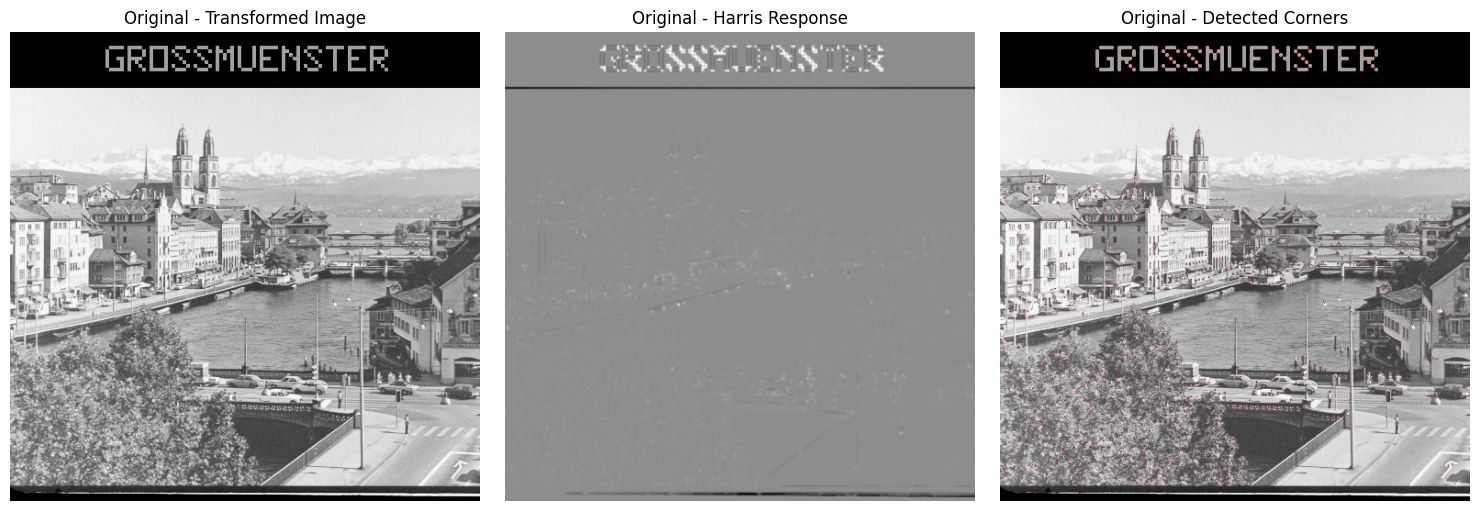

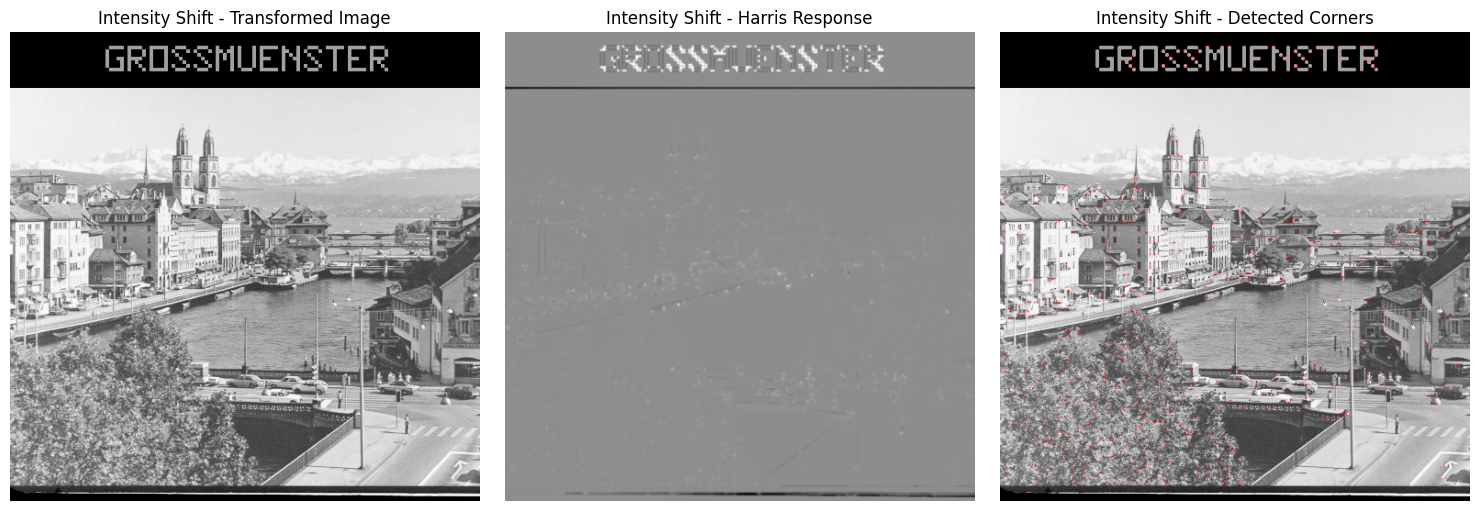

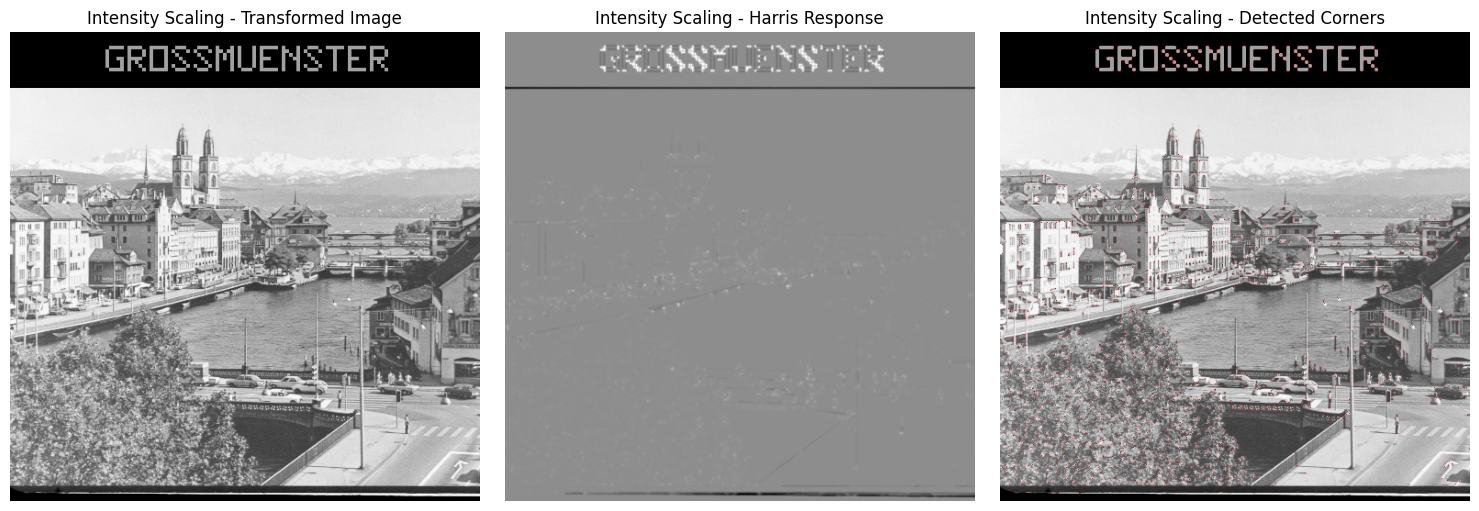

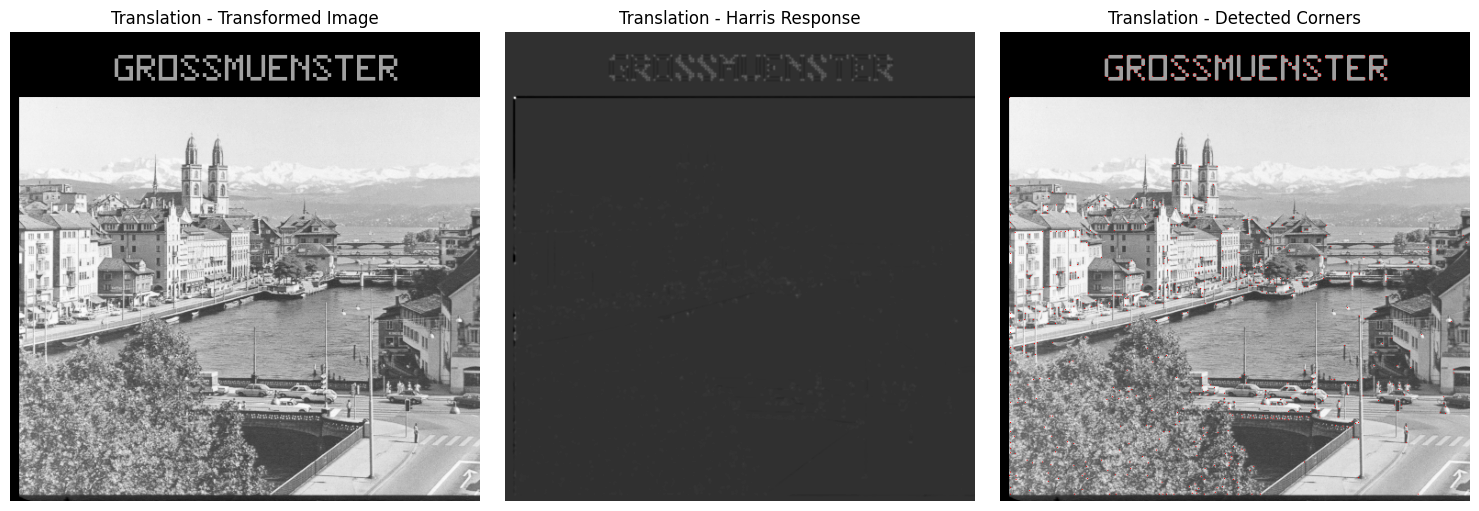

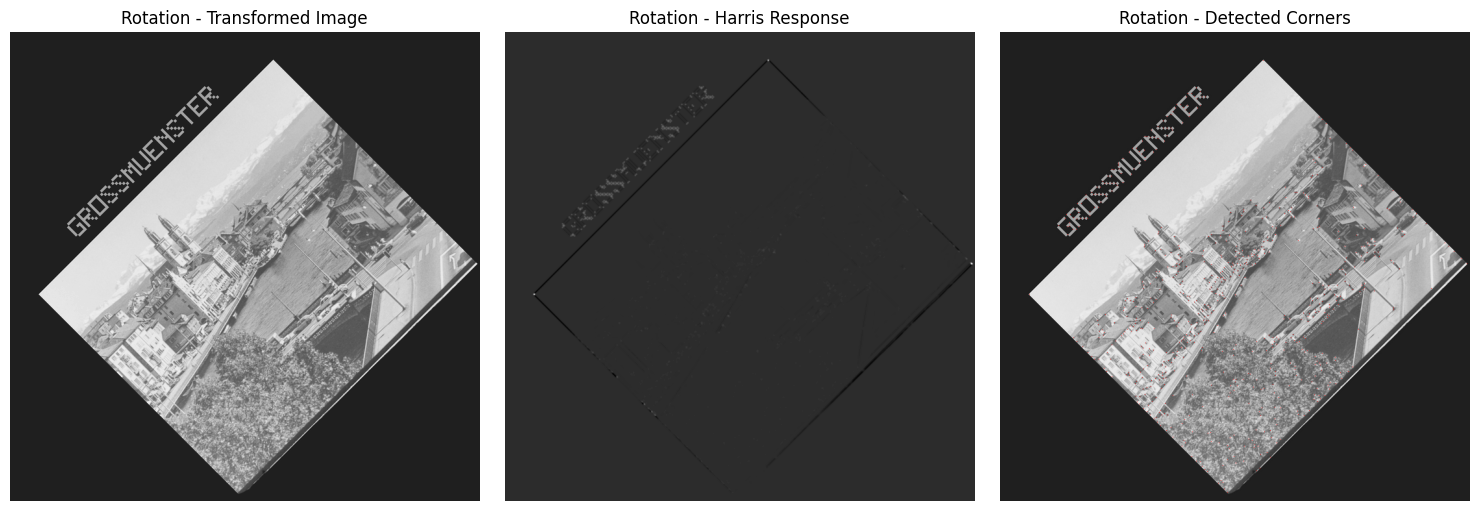

In [4]:
from skimage import io, color


#image_path = 'CircleLineRect.png'
image_path = 'zurlim.png'
img = io.imread(image_path)
gray_image = color.rgb2gray(img)
k=0.04
window_size=5


def apply_transformations_and_show(img, k, window_size):
    # transformations
    transformations = [
        ('Original', img),
        ('Intensity Shift', img + 50),
        ('Intensity Scaling', img * 1.5),
        ('Translation', shift(img, shift=(10, 10))),
        ('Rotation', rotate(img, angle=45))
    ]


    for title, transformed_img in transformations:
        # Apply the Harris detector
        corners_img, corners, harris_response = harris_corner_detector(k, transformed_img, window_size)

        # Display transformed image, Harris response, and detected corners
        plt.figure(figsize=(15, 5))

        # Transformed picture
        plt.subplot(1, 3, 1)
        plt.imshow(transformed_img, cmap='gray')
        plt.title(f"{title} - Transformed Image")
        plt.axis('off')

        # Harris response
        plt.subplot(1, 3, 2)
        plt.imshow(harris_response, cmap='gray')
        plt.title(f"{title} - Harris Response")
        plt.axis('off')

        # Image with corners detected
        plt.subplot(1, 3, 3)
        plt.imshow(corners_img)
        plt.title(f"{title} - Detected Corners")
        plt.axis('off')

        plt.tight_layout()
        plt.show()


apply_transformations_and_show(gray_image, k, window_size)
#apply_transformations_and_show(image2_gray, k, window_size)

**Canny Edge Detection**

Saving CircleLineRect.png to CircleLineRect (3).png
Saving cube_left.pgm to cube_left (3).pgm
Saving cube_right.pgm to cube_right (3).pgm
Saving zurlim.png to zurlim (3).png


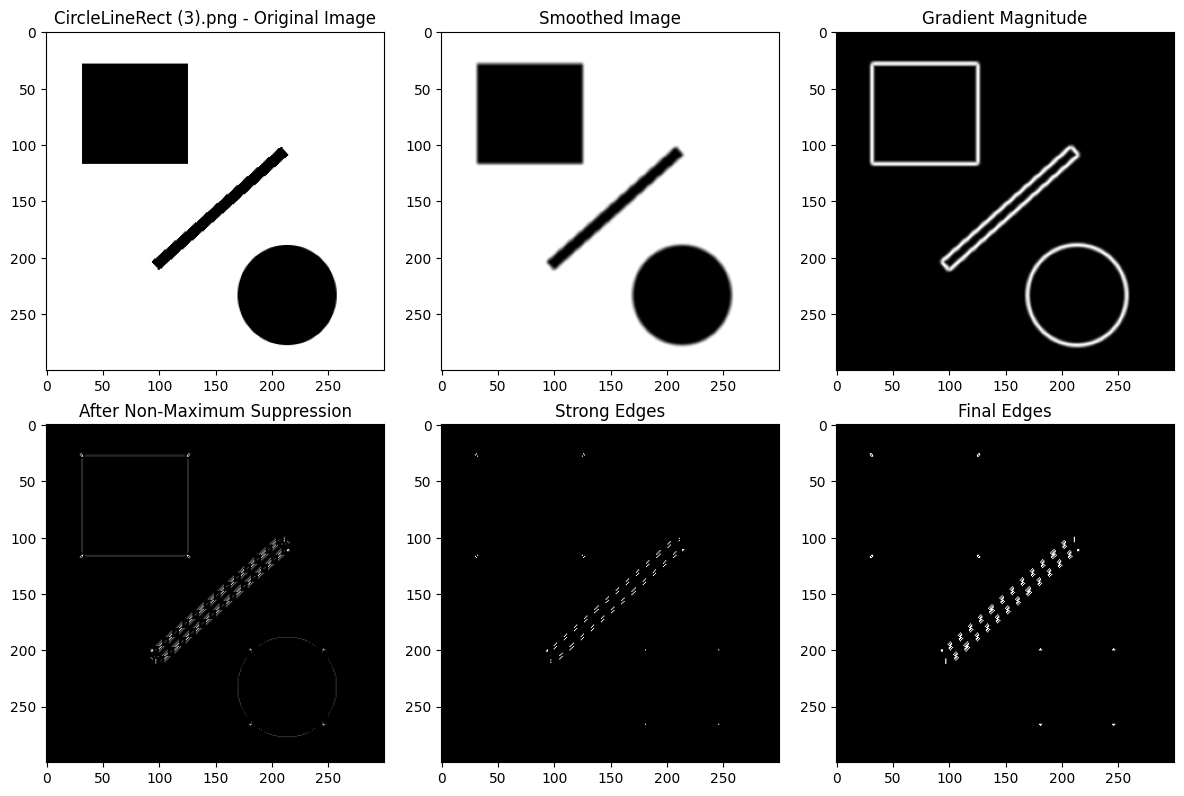

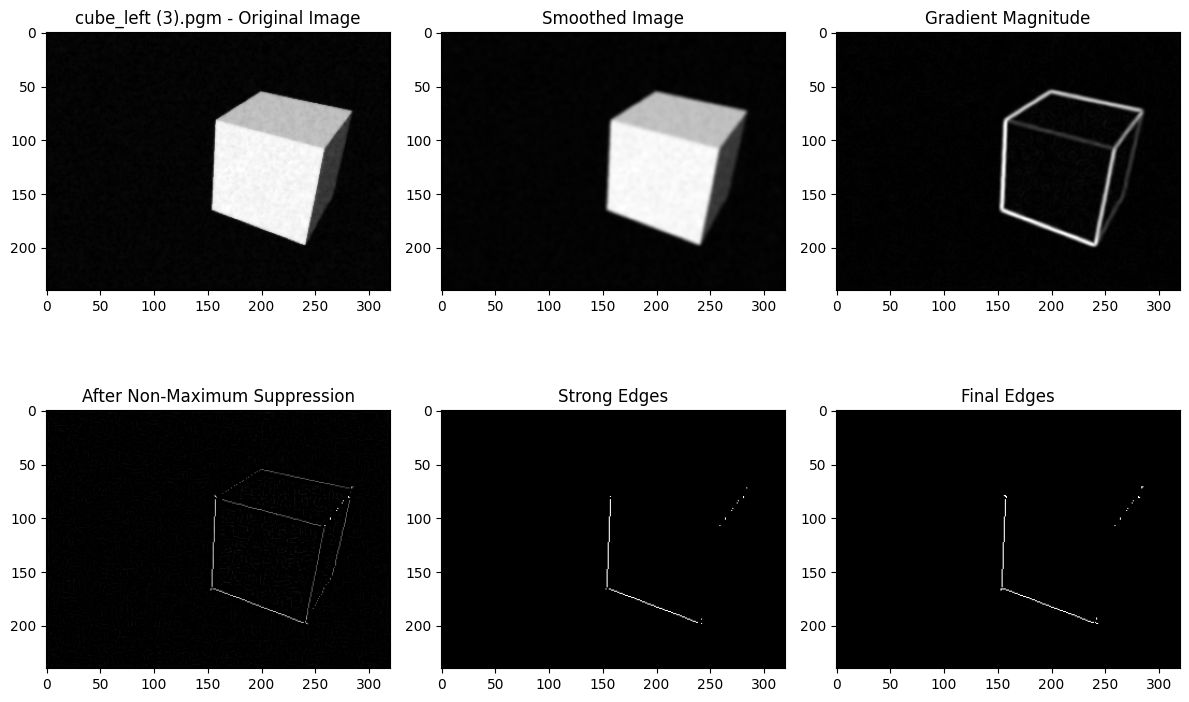

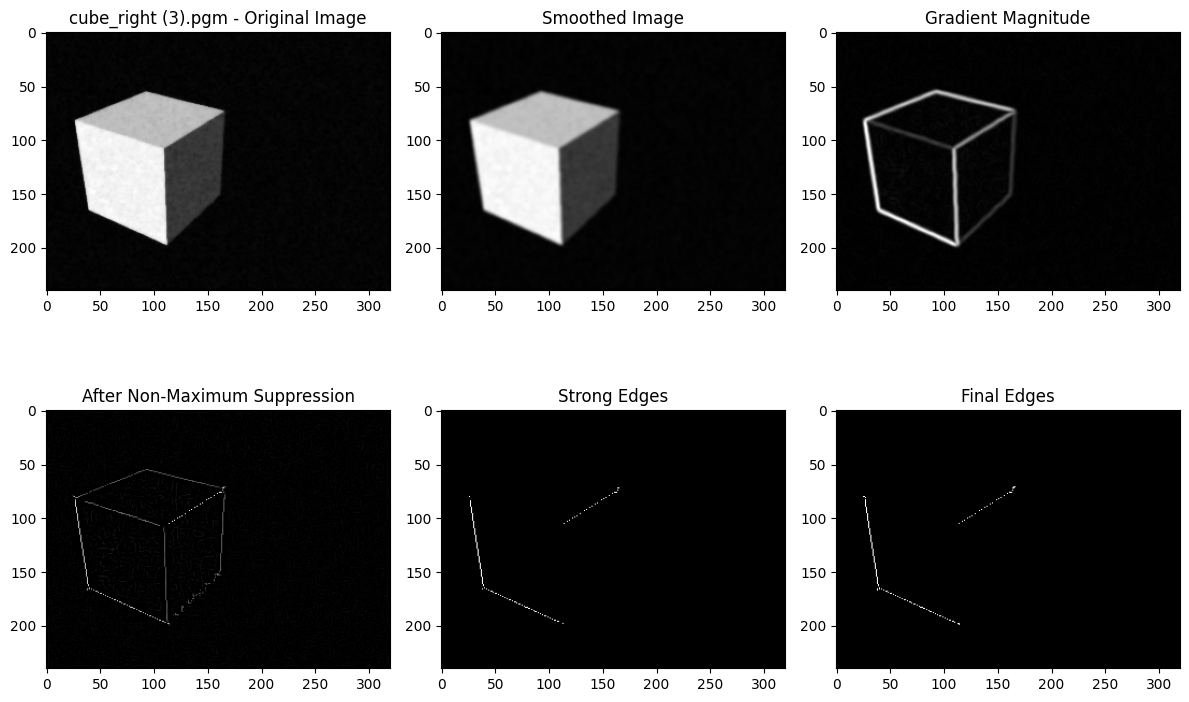

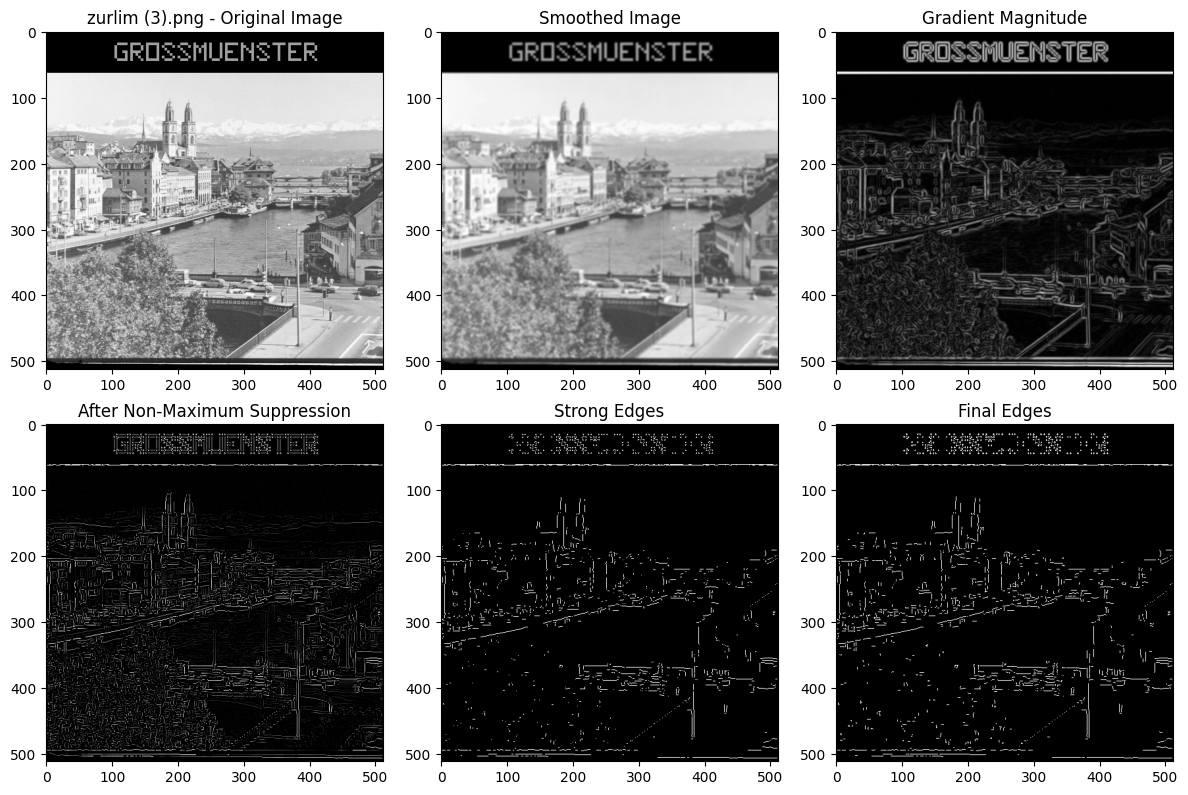

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
# Reading the three images
images = {}
for image_name in uploaded.keys():
    images[image_name] = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_GRAYSCALE)

# Function to apply all the steps of Canny edge detection on an image
def apply_canny(image, image_name):
    # 1. Smooth the image using a Gaussian filter
    smoothed_image = cv2.GaussianBlur(image, (5, 5), 1.4)

    # 2. Compute the derivatives Ix and Iy using Sobel
    Ix = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

    # 3. Compute the gradient magnitude and direction
    magnitude = np.sqrt(Ix**2 + Iy**2)
    direction = np.arctan2(Iy, Ix)

    # 4. Non-maximum suppression
    def non_maximum_suppression(magnitude, direction):
        suppressed_image = np.zeros_like(magnitude, dtype=np.uint8)
        for i in range(1, magnitude.shape[0] - 1):
            for j in range(1, magnitude.shape[1] - 1):
                angle = direction[i, j] * 180.0 / np.pi
                angle = angle if angle >= 0 else angle + 180

                if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                    neighbor_1, neighbor_2 = magnitude[i, j - 1], magnitude[i, j + 1]
                elif 22.5 <= angle < 67.5:
                    neighbor_1, neighbor_2 = magnitude[i - 1, j + 1], magnitude[i + 1, j - 1]
                elif 67.5 <= angle < 112.5:
                    neighbor_1, neighbor_2 = magnitude[i - 1, j], magnitude[i + 1, j]
                else:
                    neighbor_1, neighbor_2 = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]

                if magnitude[i, j] >= neighbor_1 and magnitude[i, j] >= neighbor_2:
                    suppressed_image[i, j] = magnitude[i, j]

        return suppressed_image

    # Apply non-maximum suppression
    nms_image = non_maximum_suppression(magnitude, direction)

    # 5. Double thresholding
    low_threshold = 50
    high_threshold = 150
    strong_edges = (nms_image > high_threshold).astype(np.uint8)
    weak_edges = ((nms_image >= low_threshold) & (nms_image <= high_threshold)).astype(np.uint8)

    # 6. Link weak edges to strong edges
    final_edges = np.copy(strong_edges)
    for i in range(1, strong_edges.shape[0] - 1):
        for j in range(1, strong_edges.shape[1] - 1):
            if weak_edges[i, j] == 1:
                if strong_edges[i - 1:i + 2, j - 1:j + 2].sum() > 0:
                    final_edges[i, j] = 1

    # Display the results
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{image_name} - Original Image')

    plt.subplot(2, 3, 2)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title('Smoothed Image')

    plt.subplot(2, 3, 3)
    plt.imshow(magnitude, cmap='gray')
    plt.title('Gradient Magnitude')

    plt.subplot(2, 3, 4)
    plt.imshow(nms_image, cmap='gray')
    plt.title('After Non-Maximum Suppression')

    plt.subplot(2, 3, 5)
    plt.imshow(strong_edges, cmap='gray')
    plt.title('Strong Edges')

    plt.subplot(2, 3, 6)
    plt.imshow(final_edges, cmap='gray')
    plt.title('Final Edges')

    plt.tight_layout()
    plt.show()

# Apply Canny edge detection to each uploaded image
for image_name, image in images.items():
    apply_canny(image, image_name)